In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.chdir('..')

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"

In [3]:
dataset_params = {
    'dataset': 'celeba64',
    'batch_size': 32,
    'cuda': True,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading celeba64 dataset...
Done!



In [20]:
%%time
from src.models.conv_vae import ConvolutionalVariationalAutoEncoder

model_params = {
    'dataset': 'celeba64',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 32,
    'learning_rate': 3e-4,
    
    'beta': 4,
    'beta_delta': 0,
    
    'device': 'cuda',
    'log_interval': 500,
    'normalize': False,
    'flatten': False,
}

convvae = ConvolutionalVariationalAutoEncoder(**model_params)

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 11.6 ms


In [21]:
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 90, 
    'report_interval': 5,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

In [22]:
import logging

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='notebooks/vae_celeba_train.log',
    format='%(asctime)s - %(levelname)s - %(message)s', 
    datefmt='%d-%b-%y %H:%M:%S',
    level=logging.INFO
)

In [ ]:
%%time
try:
    convvae.run_training(logging_func=logging.info, 
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [25]:
train_losses = pd.DataFrame(convvae.train_losses)
train_losses.tail()

,BCE,KLD,LOSS
281245,214846.718750,1233.729248,219781.640625
281246,208644.593750,1182.273193,213373.687500
281247,201552.421875,1233.208496,206485.250000
281248,205349.468750,1215.708008,210212.296875
281249,197478.875000,1306.047241,202703.062500


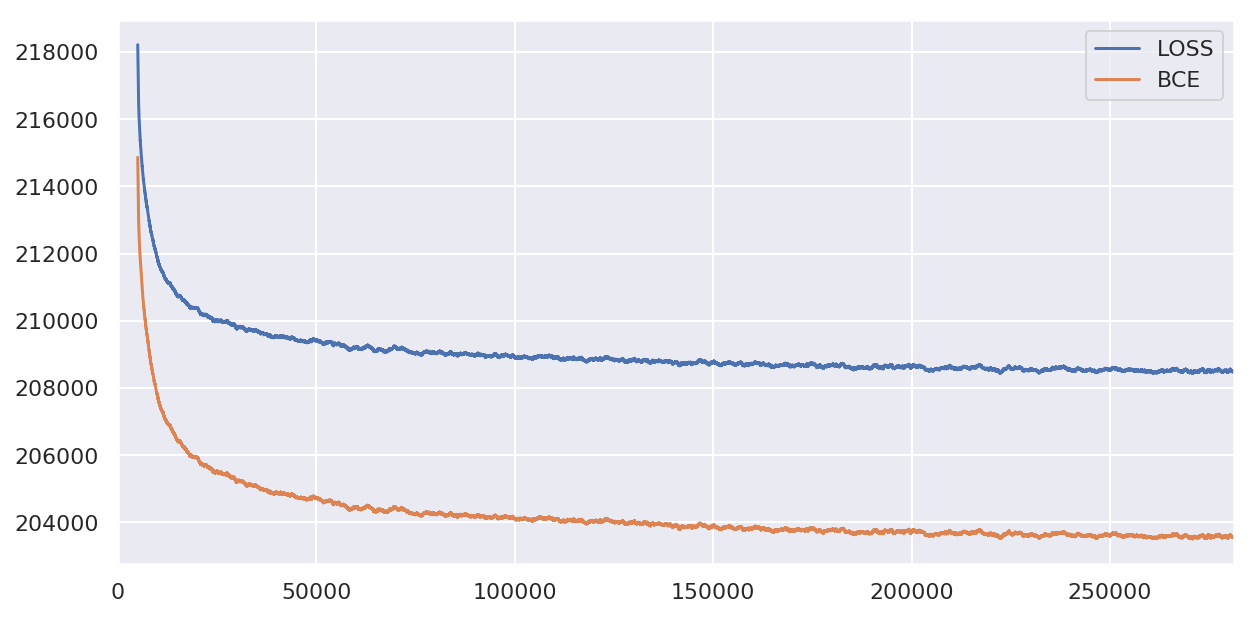

In [28]:
train_losses[['LOSS', 'BCE']].rolling(window=5000) \
        .mean().plot(figsize=(10,5));

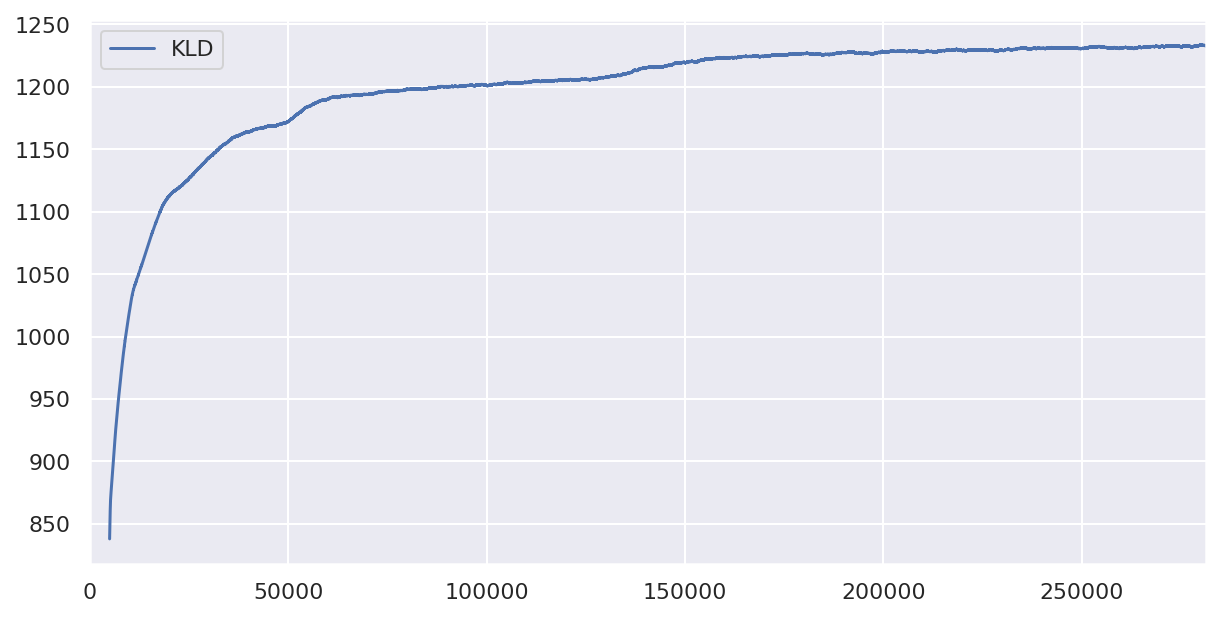

In [29]:
train_losses[['KLD']].rolling(window=5000) \
        .mean().plot(figsize=(10,5));